In [296]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math

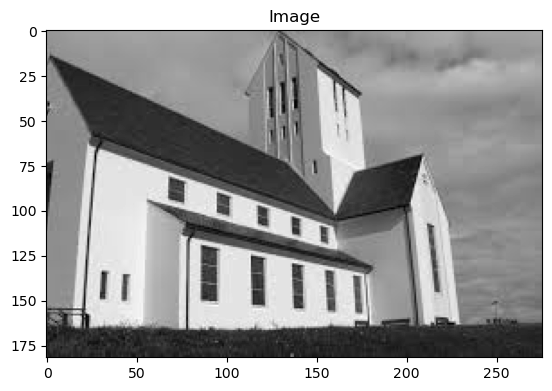

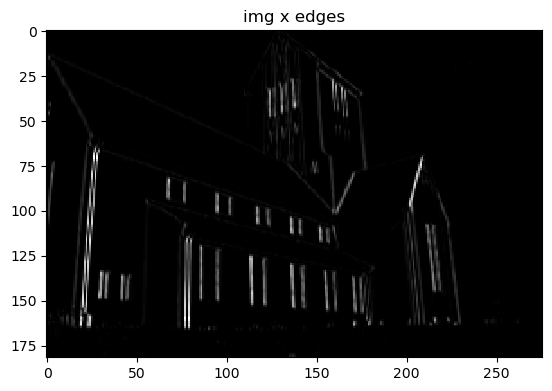

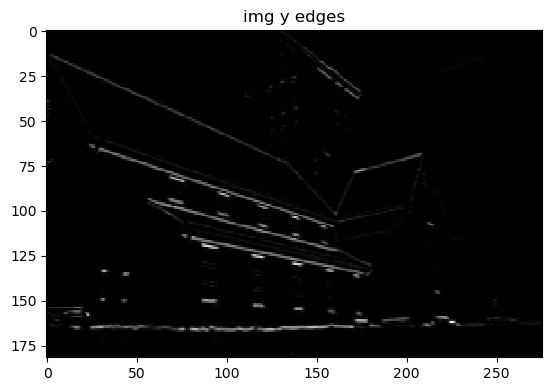

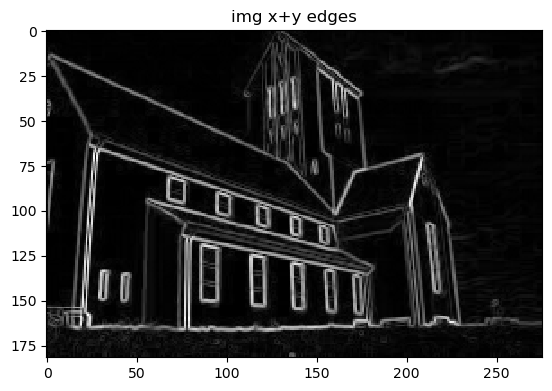

In [297]:
image = cv2.imread('./house.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.show()

edge_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)**2
edge_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)**2

plt.imshow(edge_x, interpolation='none', cmap='gray')
plt.title("img x edges")
plt.show()
plt.imshow(edge_y, interpolation='none', cmap='gray')
plt.title("img y edges")
plt.show()

edge = np.sqrt(edge_x + edge_y)
plt.imshow(edge, interpolation='none', cmap='gray')
plt.title("img x+y edges")
plt.show()

Problem 1. Edge Detection (50%)

a) Implement convolution process of smoothing Image 1 with a 5 x 5 Gaussian Filter with 𝜎 = 1 𝑎𝑛𝑑 2 , plot the corresponding output images (10%).

In [309]:
def convolution(image, kernel, average=False):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
    return output


def dnorm(x, y, s):
    return 1 / (np.sqrt(2 * np.pi) * s) * np.e ** (-(x**2+y**2)/(2*s**2))
  
def gaussian_kernel(size, sigma):
    k = np.linspace(-(size // 2), size // 2, size)
    kT = k[::-1]
    kernel_2D = np.outer(kT, k)
    for i in range(size):
        for j in range(size):
            kernel_2D[i][j] = dnorm(k[j], kT[i], sigma)   
    return kernel_2D


def xDerive(x, y, s):
    return -(x / (s **2)) * np.e ** (-(x**2+y**2)/(2*s**2))
def yDerive(x, y, s):
    return -(y / (s **2)) * np.e ** (-(x**2+y**2)/(2*s**2))
    
def derive_kernel(size, sigma):
    k = np.linspace(-(size // 2), size // 2, size)
    kT = k[::-1]
    Hx = np.outer(kT, k)
    Hy = np.outer(kT, k)
    for i in range(size):
        for j in range(size):
            Hx[i][j] = xDerive(k[j], kT[i], sigma)
            Hy[i][j] = -yDerive(k[j], kT[i], sigma)
    return Hx, Hy

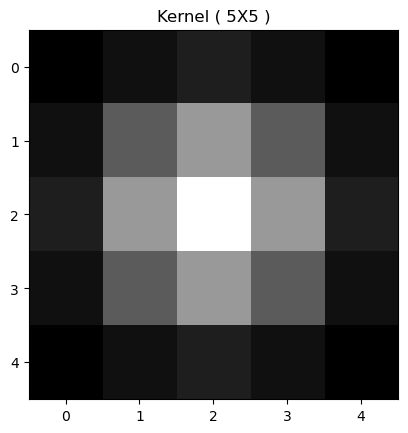

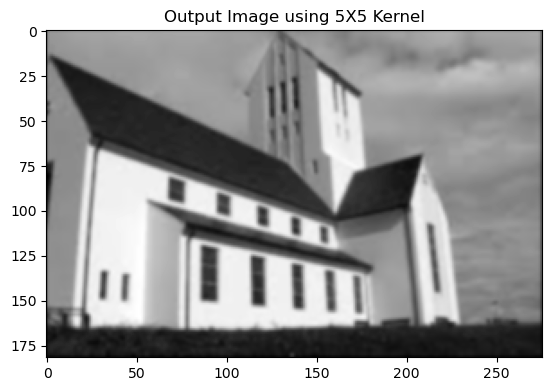

In [305]:
Guas1 = gaussian_kernel(5, 1)
plt.imshow(Guas1, interpolation='none', cmap='gray')
plt.title("Kernel ( {}X{} )".format(5, 5))
plt.show()
Guas_img1 = convolution(img, Guas1, average=True)
plt.imshow(Guas_img1, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Guas1.shape[0], Guas1.shape[1]))
plt.show()

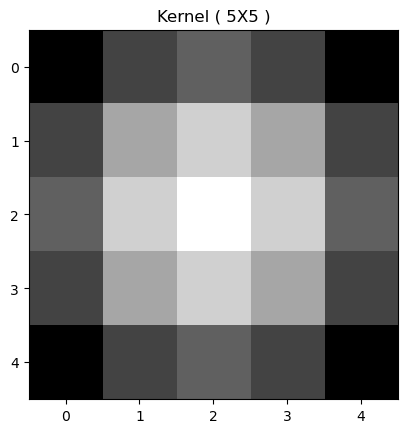

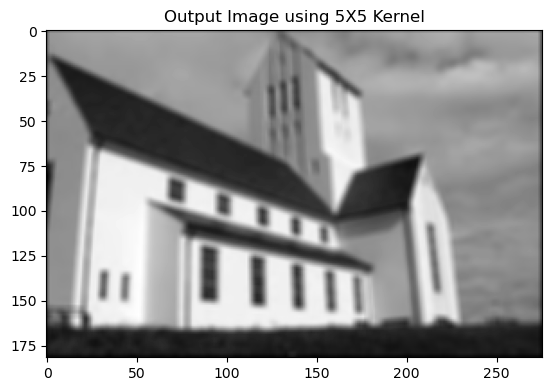

In [306]:
Guas2 = gaussian_kernel(5, 2)
plt.imshow(Guas2, interpolation='none', cmap='gray')
plt.title("Kernel ( {}X{} )".format(5, 5))
plt.show()
Guas_img2 = convolution(img, Guas2, average=True)
plt.imshow(Guas_img2, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Guas2.shape[0], Guas2.shape[1]))
plt.show()

b) Implement convolution process of convolving a 3 x 3 Sobel filters (𝑆𝑥 𝑎𝑛𝑑 𝑆𝑦) with the output images you obtained in step a. Plot the outputs of each step and the final edge map which, combines edges in x and y directions (10%).

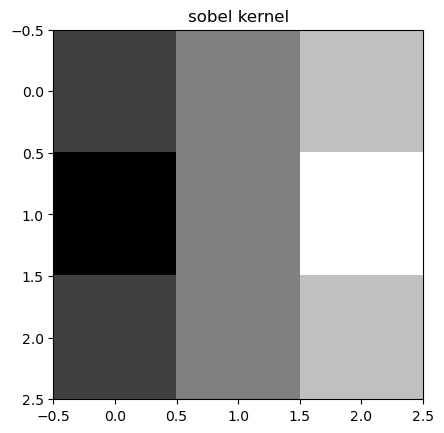

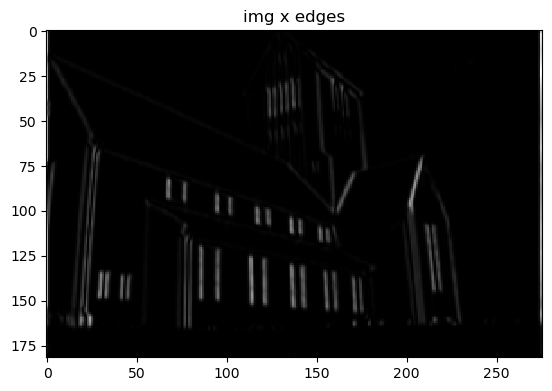

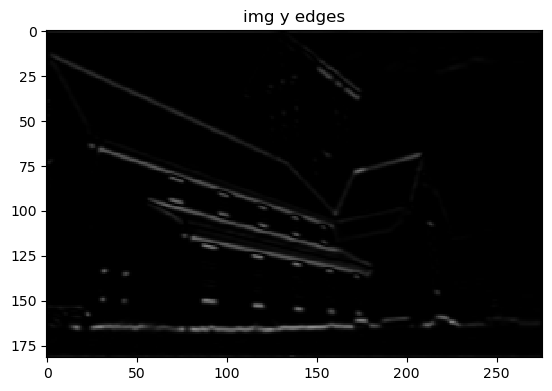

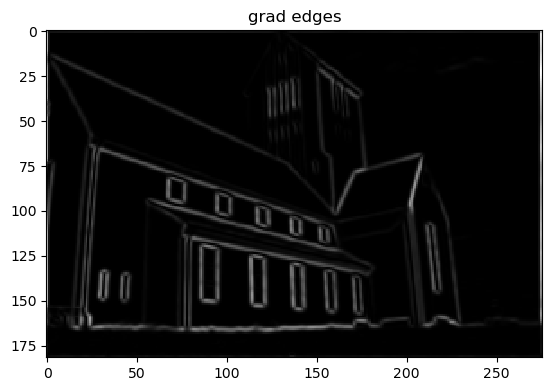

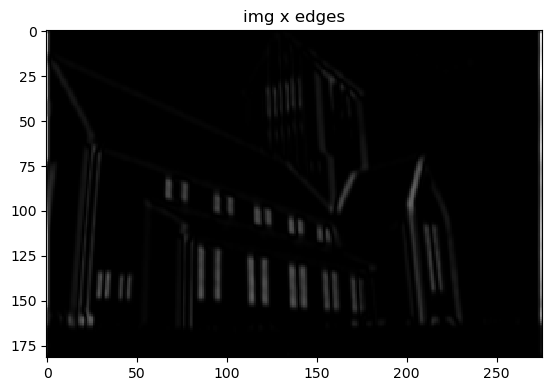

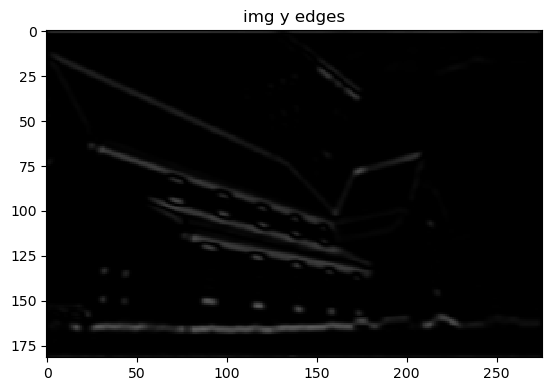

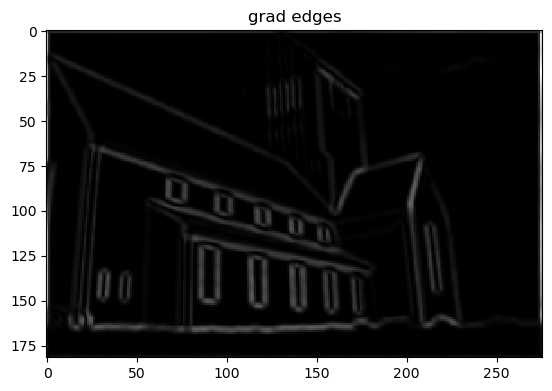

In [327]:
sobel_ker = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) /8.0
plt.imshow(sobel_ker, interpolation='none', cmap='gray')
plt.title("sobel kernel")
plt.show()


Sobelx_img1 = convolution(Guas_img1, sobel_ker, average=False) ** 2
plt.imshow(Sobelx_img1, interpolation='none', cmap='gray')
plt.title("img x edges")
plt.show()
Sobely_img1 = convolution(Guas_img1, np.flip(sobel_ker.T,axis=0), average=False) ** 2
plt.imshow(Sobely_img1, interpolation='none', cmap='gray')
plt.title("img y edges")
plt.show()
sobel_grad1 = np.hypot(Sobelx_img1,Sobely_img1)
plt.imshow(sobel_grad1, interpolation='none', cmap='gray')
plt.title("grad edges")
plt.show()

Sobelx_img2 = convolution(Guas_img2, sobel_ker, average=False) ** 2
plt.imshow(Sobelx_img2, interpolation='none', cmap='gray')
plt.title("img x edges")
plt.show()
Sobely_img2 = convolution(Guas_img2, np.flip(sobel_ker.T,axis=0), average=False) ** 2
plt.imshow(Sobely_img2, interpolation='none', cmap='gray')
plt.title("img y edges")
plt.show()
sobel_grad2 = np.hypot(Sobelx_img2,Sobely_img2)
plt.imshow(sobel_grad2, interpolation='none', cmap='gray')
plt.title("grad edges")
plt.show()

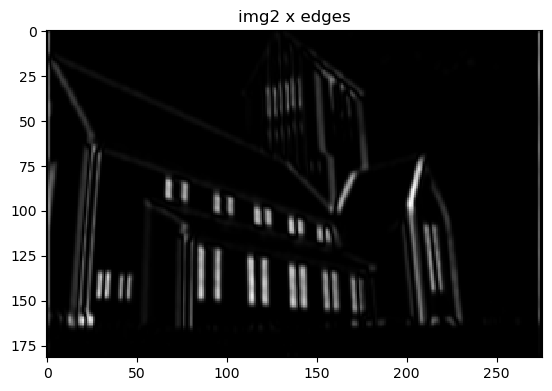

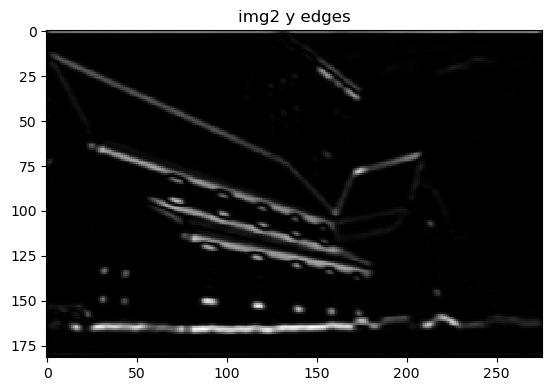

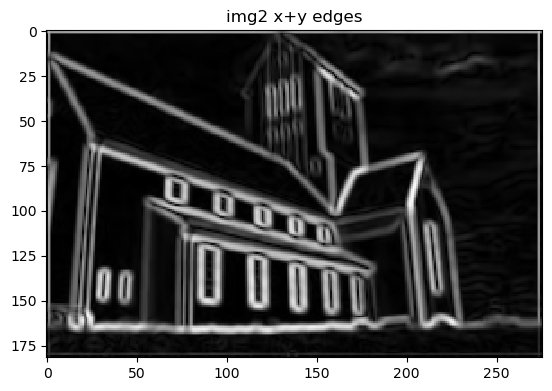

In [200]:
edge2_x = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=3)**2
edge2_y = cv2.Sobel(img2,cv2.CV_64F,0,1,ksize=3)**2

plt.imshow(edge2_x, interpolation='none', cmap='gray')
plt.title("img2 x edges")
plt.show()
plt.imshow(edge2_y, interpolation='none', cmap='gray')
plt.title("img2 y edges")
plt.show()

edge2 = np.sqrt(edge2_x + edge2_y)
plt.imshow(edge2, interpolation='none', cmap='gray')
plt.title("img2 x+y edges")
plt.show()

c) Implement convolution process of convolving Image 1 with $\frac{\partial G}{\partial x}$ 𝑎𝑛𝑑 $\frac{\partial G}{\partial y}$ filters (5 x 5 filters and for 𝜎 = 1 𝑎𝑛𝑑 2 , and plot the outputs of each step and the final edge map which combines edges in x and y directions (20%)

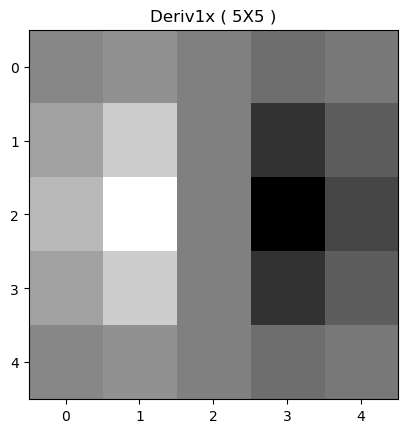

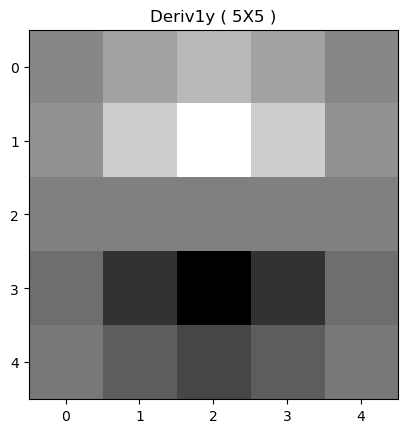

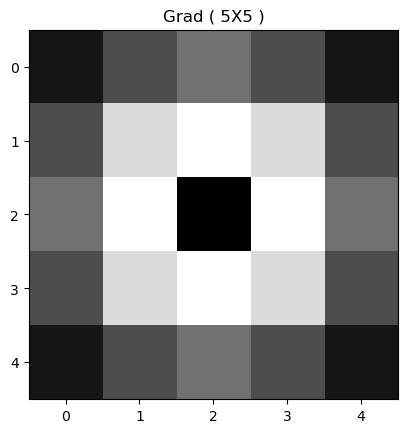

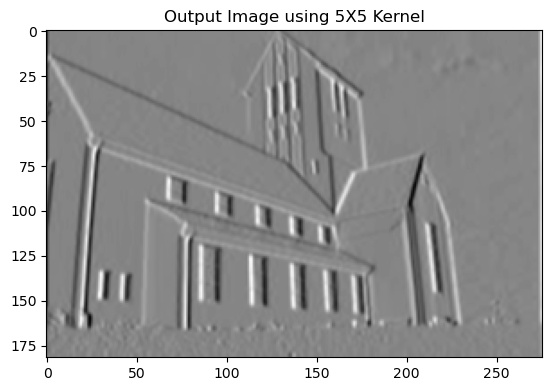

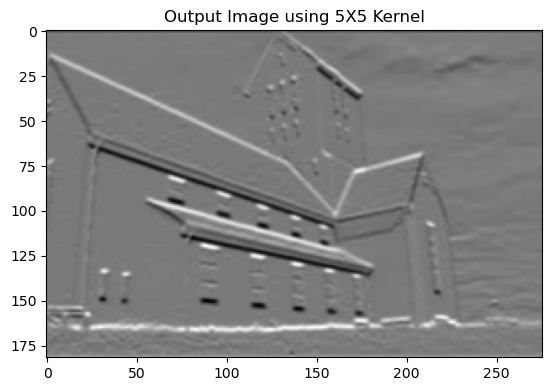

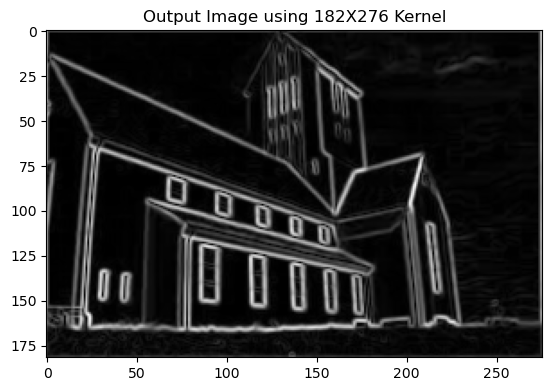

In [311]:
Deriv1x, Deriv1y = derive_kernel(5, 1)
plt.imshow(Deriv1x, interpolation='none', cmap='gray')
plt.title("Deriv1x ( {}X{} )".format(5, 5))
plt.show()
plt.imshow(Deriv1y, interpolation='none', cmap='gray')
plt.title("Deriv1y ( {}X{} )".format(5, 5))
plt.show()
plt.imshow(np.hypot(Deriv1x,Deriv1y), interpolation='none', cmap='gray')
plt.title("Grad ( {}X{} )".format(5, 5))
plt.show()
Derivx_img1 = convolution(img, Deriv1x, average=True)
plt.imshow(Derivx_img1, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Deriv1x.shape[0], Deriv1x.shape[1]))
plt.show()
Derivy_img1 = convolution(img, Deriv1y, average=True)
plt.imshow(Derivy_img1, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Deriv1y.shape[0], Deriv1y.shape[1]))
plt.show()
Deriv_grad1 = np.hypot(Derivx_img1,Derivy_img1)
plt.imshow(Deriv_grad1, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Grad.shape[0], Grad.shape[1]))
plt.show()

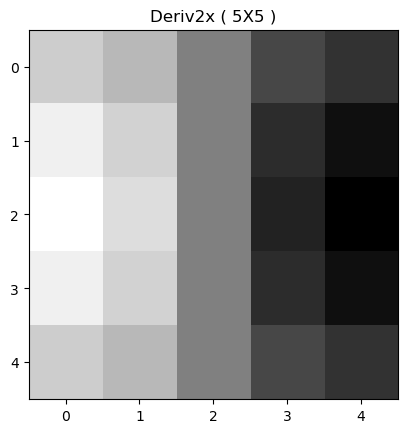

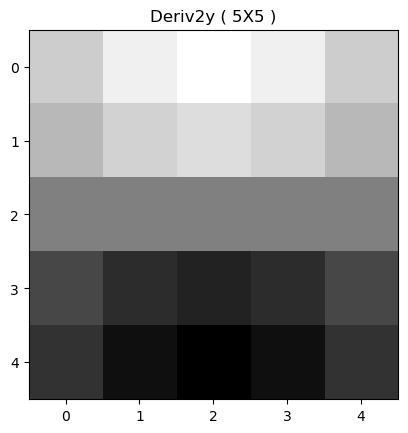

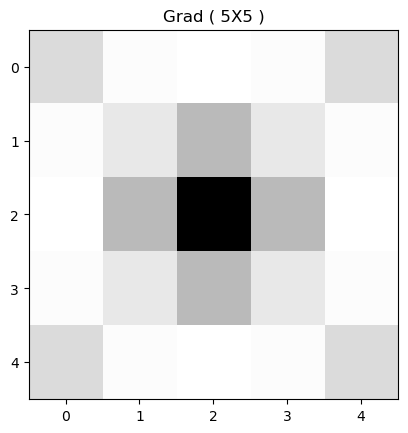

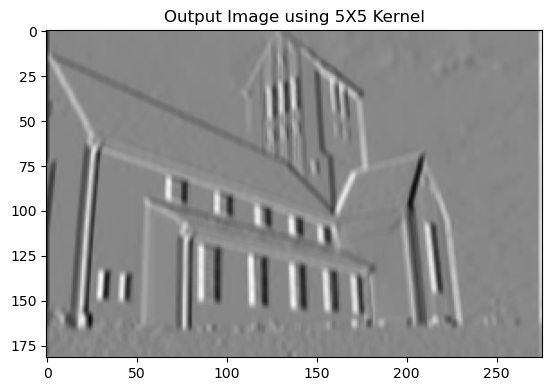

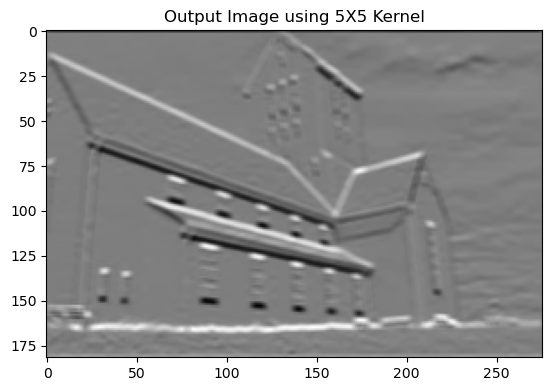

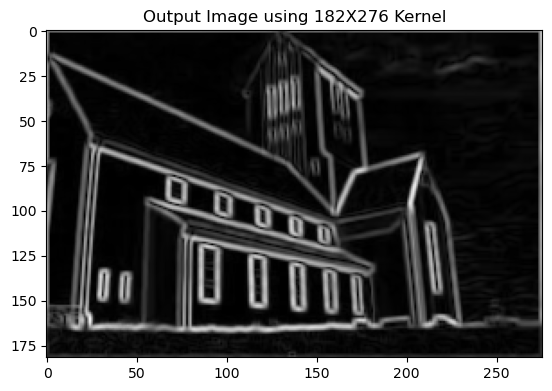

In [312]:
Deriv2x, Deriv2y = derive_kernel(5, 2)
plt.imshow(Deriv2x, interpolation='none', cmap='gray')
plt.title("Deriv2x ( {}X{} )".format(5, 5))
plt.show()
plt.imshow(Deriv2y, interpolation='none', cmap='gray')
plt.title("Deriv2y ( {}X{} )".format(5, 5))
plt.show()
plt.imshow(np.hypot(Deriv2x,Deriv2y), interpolation='none', cmap='gray')
plt.title("Grad ( {}X{} )".format(5, 5))
plt.show()
Derivx_img2 = convolution(img, Deriv2x, average=True)
plt.imshow(Derivx_img2, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Deriv2x.shape[0], Deriv2x.shape[1]))
plt.show()
Derivy_img2 = convolution(img, Deriv2y, average=True)
plt.imshow(Derivy_img2, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Deriv2y.shape[0], Deriv2y.shape[1]))
plt.show()
Deriv_grad2 = np.hypot(Derivx_img2,Derivy_img2)
plt.imshow(Deriv_grad2, cmap='gray')
plt.title("Output Image using {}X{} Kernel".format(Grad.shape[0], Grad.shape[1]))
plt.show()

Please explain what do you observe comparing the final output of b and c (10%).